## Import de la donnée

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


df_marketing= pd.read_csv("marketing_campaign.csv", sep="\t")


# Nettoyage de la donnée

In [3]:
# Remplacer les valeurs manquantes de Income par la médiane
df_marketing['Income'].fillna(df_marketing['Income'].median(), inplace=True)

# Supprimer les colonnes inutiles
df_marketing.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)

# Convertir Dt_Customer en datetime et calculer l'ancienneté du client
df_marketing['Dt_Customer'] = pd.to_datetime(df_marketing['Dt_Customer'], format='%d-%m-%Y')
df_marketing['Customer_Age'] = (pd.Timestamp.today() - df_marketing['Dt_Customer']).dt.days

# Transformer Year_Birth en âge
df_marketing['Age'] = 2025 - df_marketing['Year_Birth']
df_marketing.drop(columns=['Year_Birth'], inplace=True)

# Regrouper les statuts matrimoniaux
df_marketing['Marital_Status'] = df_marketing['Marital_Status'].replace({
    'Married': 'Married', 'Together': 'Married',
    'Single': 'Single', 'Divorced': 'Single', 'Widow': 'Single', 
    'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'
})

# Encodage one-hot de Education et Marital_Status
df_marketing= pd.get_dummies(df_marketing, columns=['Education', 'Marital_Status'], drop_first=True)

# Créer une variable Total_Spending (dépenses totales)
df_marketing['Total_Spending'] = df_marketing[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

## Methode du coude pour definir le nombre de clusters optimal

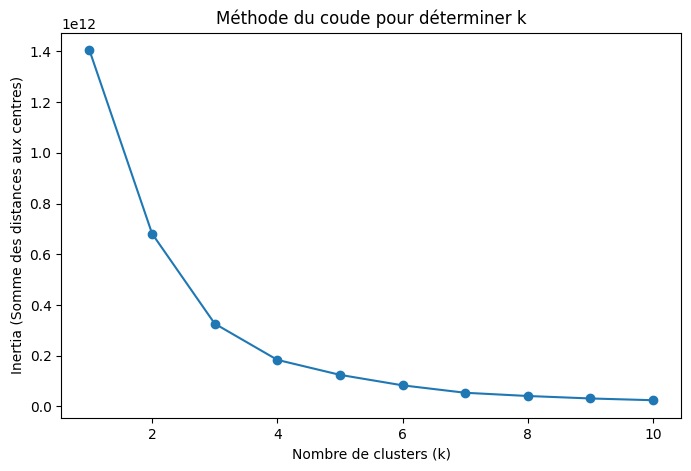

In [4]:
df_marketing = df_marketing.drop(columns=['Dt_Customer'])

# Appliquer la méthode du coude
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(df_marketing)
    inertia_values.append(kmeans_model.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertia (Somme des distances aux centres)')
plt.title("Méthode du coude pour déterminer k")
plt.show()

/home/lindsay/.pyenv/versions/3.10.12/envs/artefact/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


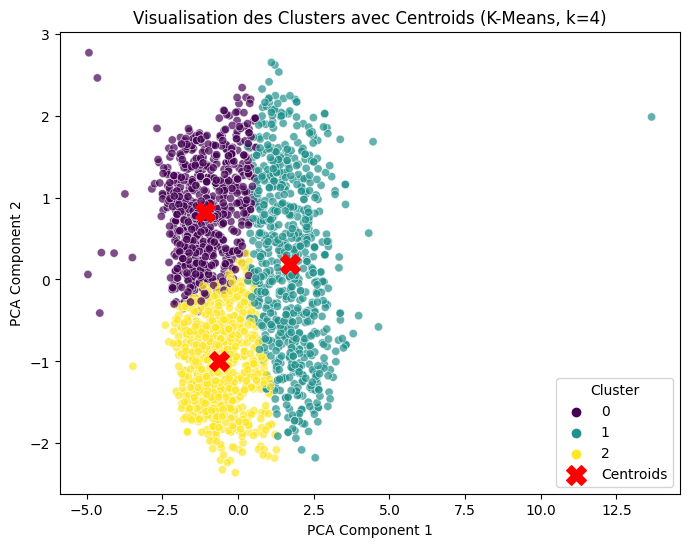

In [8]:
# Normalisation des variables numériques
numeric_features = ['Income', 'Recency', 'NumWebVisitsMonth', 'Customer_Age', 'Age', 'Total_Spending']
scaler = StandardScaler()
df_marketing[numeric_features] = scaler.fit_transform(df_marketing[numeric_features])


# Sélection des variables pour le clustering
X = df_marketing[numeric_features]

# Appliquer K-Means avec k=4 (nombre optimal de clusters)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_marketing['Cluster'] = kmeans.fit_predict(X)


# Réduction de dimension avec PCA pour visualiser en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_marketing['PCA1'] = X_pca[:, 0]
df_marketing['PCA2'] = X_pca[:, 1]


plt.figure(figsize=(8, 6))

# Afficher les points des clusters
sns.scatterplot(x=df_marketing['PCA1'], y=df_marketing['PCA2'], hue=df_marketing['Cluster'], palette='viridis', alpha=0.7)

# Calculer les centroïdes après transformation PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Ajouter les centroïdes au graphique
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, color='red', label='Centroids')

# Labels et titre
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisation des Clusters avec Centroids (K-Means, k=4)')
plt.legend(title='Cluster')
plt.show()


In [9]:
print(df_marketing.columns)

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Customer_Age', 'Age',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Single', 'Total_Spending', 'Cluster',
       'PCA1', 'PCA2'],
      dtype='object')
